###  Steps:
- find the changes
- find the cause of the changes (may include more data searching)

In [93]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option("max_rows", 5)

### Load data

In [94]:
df = pd.read_table("Churn_UsersProfile.txt", delimiter='|',encoding ='latin1')
print(df.columns)

df["log_Average_BusUsers_per_Day"] = np.log10(df["Average_BusUsers_per_Day"])
df

Index(['Region_of_Origin', 'District_of_Origin', 'County_of_Origin', 'Period',
       'GenderDescription', 'AgeClassDescription', 'Average_BusUsers_per_Day'],
      dtype='object')


,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,log_Average_BusUsers_per_Day
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206,2.468634
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817,3.034088
...,...,...,...,...,...,...,...,...
542,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,45-54,1443.335763,3.159367
543,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,55-64,374.627538,2.573600


### Encode Labels with sklearn with for loop

In [95]:
from sklearn.preprocessing import LabelEncoder
df2 = df
for i in range(len(df.columns)-1):
    #print(i)
    enc = LabelEncoder()
    enc.fit(df.iloc[:,i]) # get a LabelEncoder encoding for the labels (returns?)
    #print(enc.classes_)
    newcol_name = df.columns[i]
    newcol_name += '_enc'
    df2[newcol_name] = enc.transform(df.iloc[:,i])

df

,Region_of_Origin,District_of_Origin,County_of_Origin,Period,GenderDescription,AgeClassDescription,Average_BusUsers_per_Day,log_Average_BusUsers_per_Day,Region_of_Origin_enc,District_of_Origin_enc,County_of_Origin_enc,Period_enc,GenderDescription_enc,AgeClassDescription_enc,Average_BusUsers_per_Day_enc
0,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,15-24,294.194206,2.468634,0,1,2,0,0,0,198
1,R1 - AM Lisboa,Lisboa,Amadora,Sep-19 to Feb-20,Female,25-34,1081.652817,3.034088,0,1,2,0,0,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
542,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,45-54,1443.335763,3.159367,1,2,33,1,1,3,454
543,R2 - AM Porto,Porto,Vila Nova de Gaia,Sep-20 to Jan-21,Male,55-64,374.627538,2.573600,1,2,33,1,1,4,233


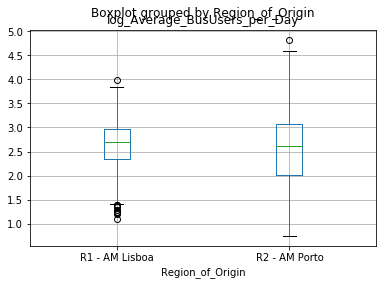

In [96]:
#plt.plot(df["Region_of_Origin"], df["Average_BusUsers_per_Day"], '.')
ax = df.boxplot(column='log_Average_BusUsers_per_Day', by='Region_of_Origin', grid=True)

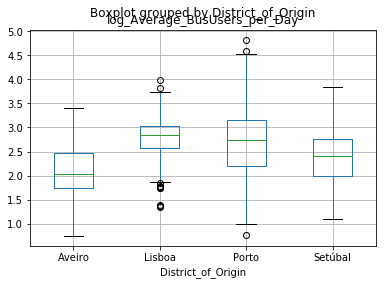

In [97]:
ax = df.boxplot(column='log_Average_BusUsers_per_Day', by='District_of_Origin', grid=True)

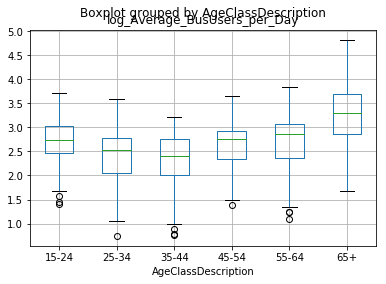

In [98]:
ax = df.boxplot(column='log_Average_BusUsers_per_Day', by='AgeClassDescription', grid=True)

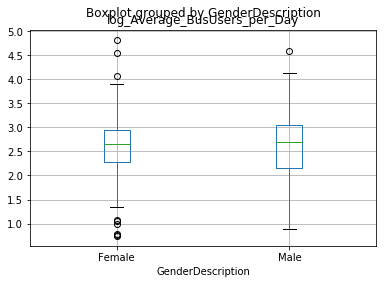

In [99]:
ax = df.boxplot(column='log_Average_BusUsers_per_Day', by='GenderDescription', grid=True)

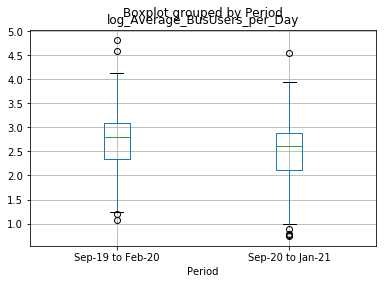

In [100]:
ax = df.boxplot(column='log_Average_BusUsers_per_Day', by='Period', grid=True)

In [ ]:
#plot a histogram of period
